In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite

# Median Comparison

In [3]:
# query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1"]
query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]
query_max_med = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]

In [4]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)
# comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(query_max_med), query_max_med, boot='b', medmean=2, verbose=False, gini_balance=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
170 Total Spectra found
5 flagged spectra removed 165 spectra left
3 spectra of peculiar Ias removed 162 spectra left
148 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination


composite.py:1223: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1260: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


99 total SNe
removed spectra of SNe with A_V > 2.0

Using 142 spectra of 96 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 29 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...


In [5]:
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(query_max_med), query_max_med, boot=True, medmean=2, verbose=False, gini_balance=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
../data/kaepora_v1.db
170 Total Spectra found
5 flagged spectra removed 165 spectra left
3 spectra of peculiar Ias removed 162 spectra left
148 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination
99 total SNe
removed spectra of SNe with A_V > 2.0

Using 142 spectra of 96 SNe
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.132686382681
dm15:  1.12641065854
Redshift:  0.0147218282993
Phase:  0.134899740466
dm15:  1.086732183
Redshift:  0.0148006180978


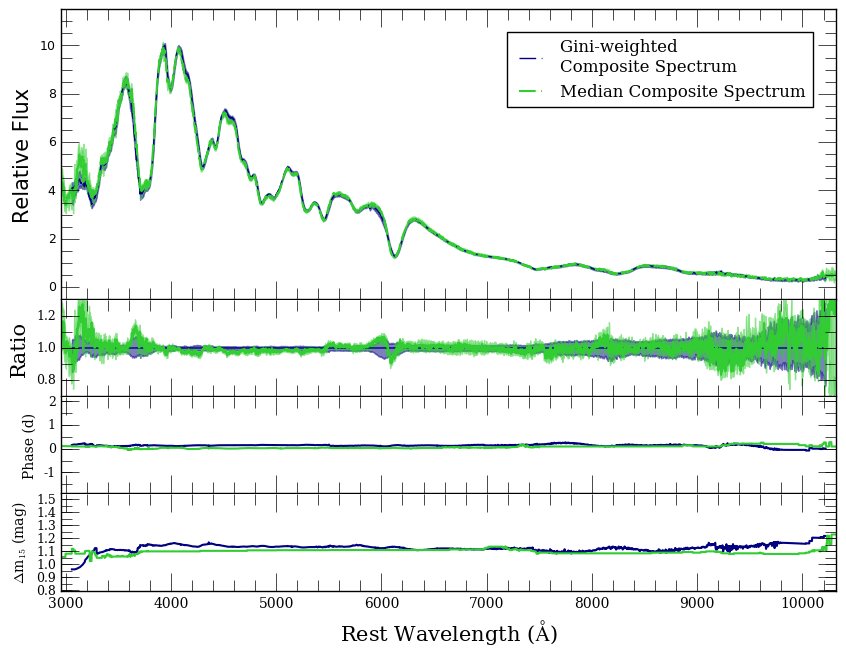

In [6]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12, include_phase_dm15 = True,
                     legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"], 
                     savename = 'main_composites_updated/med_comparison_large')
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], min_num_show = 12, include_phase_dm15 = True,
#                      legend_labels = ["Gini-weighted \nComposite Spectrum", "Median Composite Spectrum"])

In [19]:
# query_max_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -.2 and phase <= .2"]
query_max_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.08 and dm15_source < 1.15) or (dm15_from_fits >= 1.08 and dm15_from_fits < 1.15))"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.5) or (dm15_from_fits >= 1. and dm15_from_fits < 1.5))"]
# query_max_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [20]:
comps_max_dm15, sn_arrays_max_dm15, boot_sn_arrays_max_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)
# comps_max_med_dm15, sn_arrays_max_med_dm15, boot_sn_arrays_max_med_dm15 = query_db.main(len(query_max_dm15), query_max_dm15, boot='b', medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.08 and dm15_source < 1.15) or (dm15_from_fits >= 1.08 and dm15_from_fits < 1.15))
../data/kaepora_v1.db
27 Total Spectra found
1 flagged spectra removed 26 spectra left
0 spectra of peculiar Ias removed 26 spectra left
22 spectra of SNe with that have host reddening corrections
Arrays cleaned
1 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0

Using 22 spectra of 13 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.105220523975
dm15:  1.10640839444
Redshift:  0.0131869184831
Phase:  -0.00622135595425
dm15:  1.11289181469
Redshift:  0.00912299768244


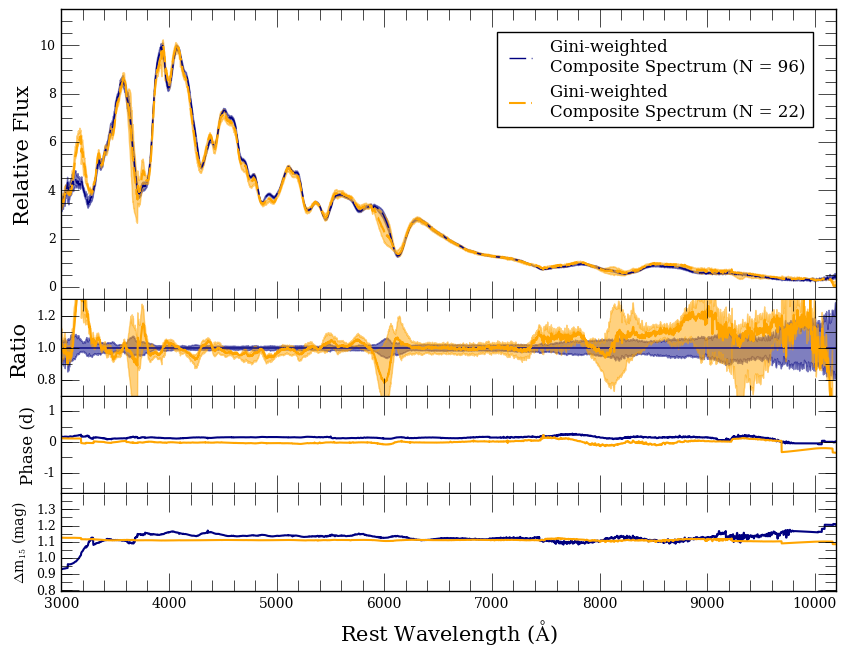

In [23]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_dm15[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp3"
query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],include_phase_dm15 = True,
                     legend_labels = ["Gini-weighted \nComposite Spectrum (N = 96)", "Gini-weighted \nComposite Spectrum (N = 22)"],
                     savename='main_composites_updated/sample_size_comparison')
# query_db.scaled_plot([comparisons[0], comparisons[1]], zoom=False, dashes = [12,4], include_spec_bin = True, xlim = [3000,10200],
#                      legend_labels = ["Composite Spectrum \n"+r"($-1 < \tau\ < +1$)", "Composite Spectrum \n"+r"($-0.1 < \tau\ < +0.1$)"])

# Gini Comparison

In [10]:
gini_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32"]

In [11]:
comps_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_med, sn_arrays_max_med, boot_sn_arrays_max_med = query_db.main(len(gini_query), gini_query, boot='nb', medmean=2, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini, sn_arrays_max_gini, boot_sn_arrays_max_gini = query_db.main(len(gini_query), gini_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
../data/kaepora_v1.db


OperationalError: no such table: Supernovae

2001el


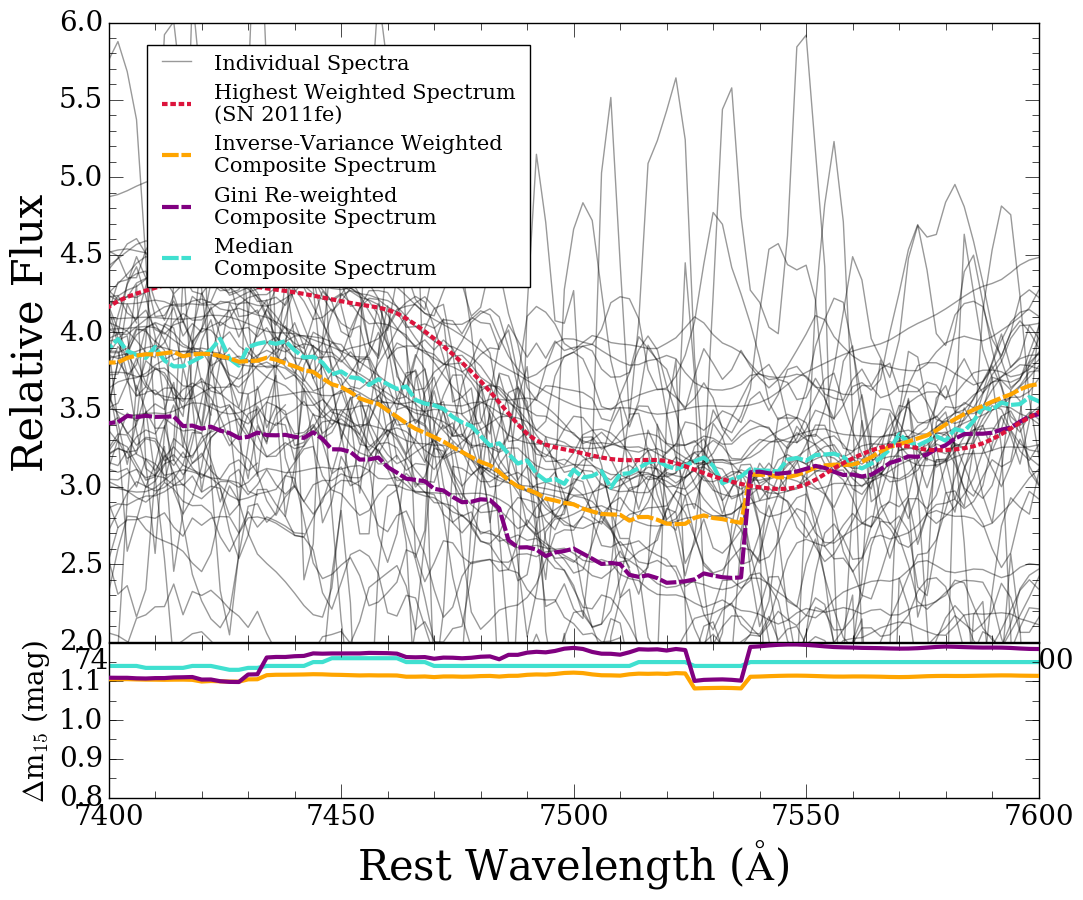

In [15]:
comparisons = []
comparisons.append(comps_max[0])
comparisons.append(comps_max_med[0])
comparisons.append(comps_max_gini[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0], comp2 = comparisons[2], comp3 = comparisons[1], one_color = True, xlim = [7400,7600], ylim = [2,6], dm15=True)
# query_db.scaled_plot([comparisons[0], comparisons[1]], min_num_show=1, xlim = [2500,4000])
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max[0])

In [16]:
# gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5))"]
gini_query_2 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'"]

In [17]:
comps_max2, sn_arrays_max2, boot_sn_arrays_max2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=False)
comps_max_gini2, sn_arrays_max_gini2, boot_sn_arrays_max_gini2 = query_db.main(len(gini_query_2), gini_query_2, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fits < 1.4)) and Supernovae.SN != '1997bp'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050614-hst.flm']
(4, 'questionable spectra removed', 56, 'spectra left')
(0, 'Peculiar Ias removed', 56, 'spectra left')
55 spectra with host corrections
173 questionable files currently ignored
14 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
14 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.4) or (dm15_from_fits >= 1. and dm15_from_fi

1996x


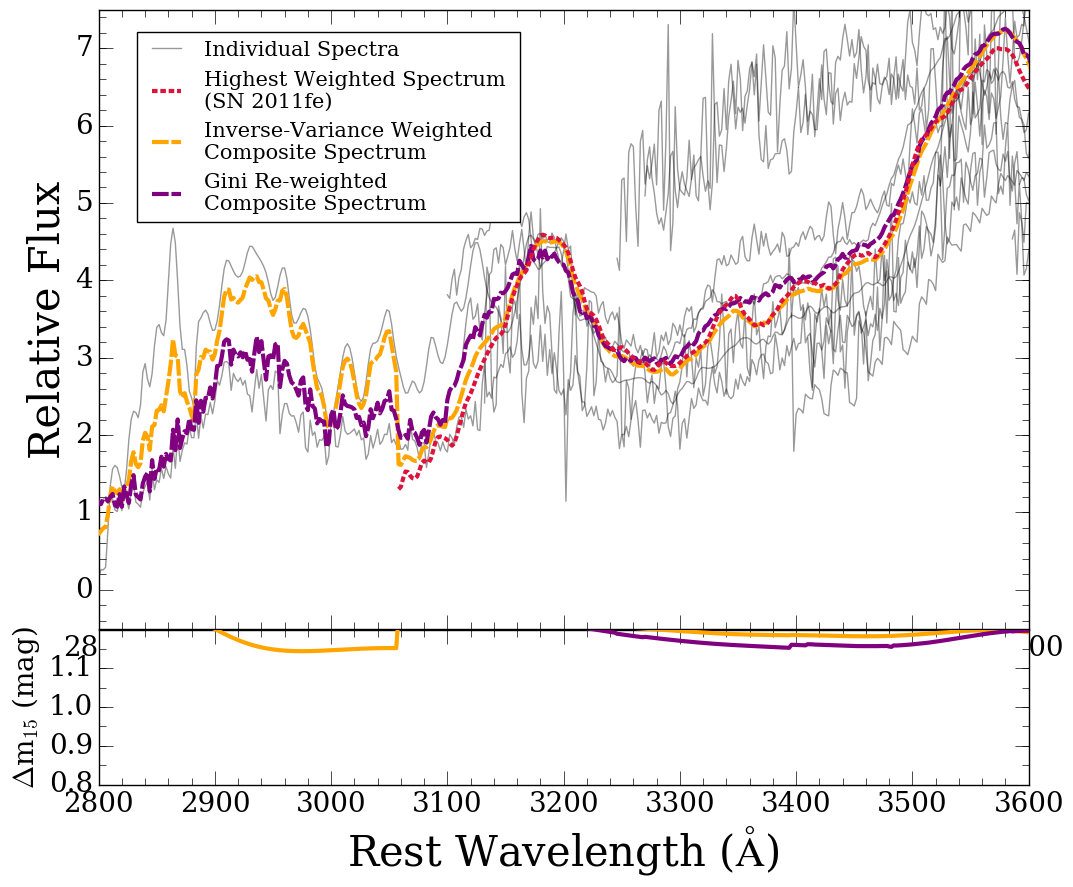

In [23]:
comparisons = []
comparisons.append(comps_max2[0])
comparisons.append(comps_max_gini2[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max2[0], comp2 = comparisons[1], one_color = True, xlim = [2800,3600], ylim = [-.5,7.5], boots=False, dm15=True)

In [12]:
# gini_query_3 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 2 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.1) or (dm15_from_fits >= .9 and dm15_from_fits < 1.1))"]
gini_query_3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.25) or (dm15_from_fits >= .5 and dm15_from_fits < 1.25))"]

In [13]:
comps_max3, sn_arrays_max3, boot_sn_arrays_max3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=False)
comps_max_med3, sn_arrays_max_med3, boot_sn_arrays_max_med3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=2, verbose=False, gini_balance=False)
comps_max_gini3, sn_arrays_max_gini3, boot_sn_arrays_max_gini3 = query_db.main(len(gini_query_3), gini_query_3, boot='nb', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.25) or (dm15_from_fits >= .5 and dm15_from_fits < 1.25))
../data/kaepora_v1.db
232 Total Spectra found
14 flagged spectra removed 218 spectra left
2 spectra of peculiar Ias removed 216 spectra left
189 spectra of SNe with that have host reddening corrections
Arrays cleaned
7 spectra may have telluric contamination
86 total SNe
removed spectra of SNe with A_V > 2.0

Using 184 spectra of 84 SNe
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -4 and phase <= 0 and ((dm15_source >= .5 and dm15_source < 1.25) or (dm15_from_fits >= .5 and dm15_from_fits < 1.25))
../data/kaepora_v1.db
232 Total Spectra found
14 flagged spectra removed 218 spectra left
2 spectra of peculiar Ias removed 216 spectra left
189 spectra of SNe with that have host reddening corrections
Arrays cleaned
7 spectra may have tel

2011fe_combined


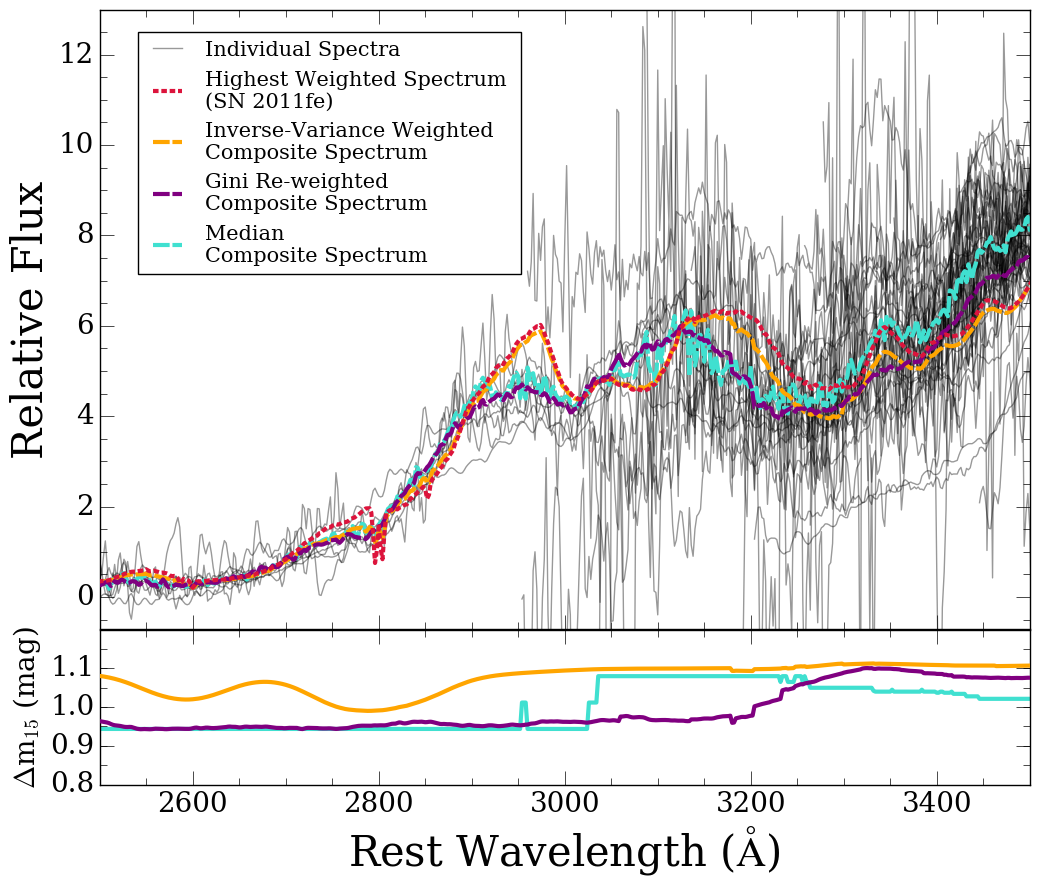

In [24]:
comparisons = []
comparisons.append(comps_max3[0])
comparisons.append(comps_max_gini3[0])
comparisons.append(comps_max_med3[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
comparisons[2].name = "Comp3"
query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True, savename='gini_comparison')
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)

# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], comp3 = comparisons[2], one_color = True, xlim = [2500,3500], ylim = [-.7,13], boots=False, dm15=True)
# query_db.plot_comp_and_all_spectra(comparisons[0], sn_arrays_max3[0], comp2 = comparisons[1], one_color = True, xlim = [2000,4500], ylim = [-.07,1.3], boots=False)

## Reddening Effects

In [25]:
red_query = ['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000']

In [39]:
comps_red, sn_arrays_red, boot_sn_arrays_red = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=.5)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
sn1999ac-19990312-ui-corrected.flm has low reddening!
sn2001fe-20011115-ui.flm has low reddening!
sn2002ha-20021102-ui-corrected.flm has low reddening!
sn2002he-20021106.649-joined.flm has low reddening!
sn2003cq-20030408-ui.flm has low reddening!
sn2005ag-20050212.596-br.flm has low reddening!
sn2005cf-20050611.6-uvot.flm has low reddening!
sn2005ms-20060106.400-ui.flm has low reddening!
sn2006ej-20060824.430-ui.flm has low reddening!
sn2006n-20060123.286-ui.flm has lo

In [29]:
comps, sn_arrays, boot_sn_arrays = query_db.main(len(red_query), red_query, boot='nb', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, low_av_test=None)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2005cf-20050611-hst.flm']
(14, 'questionable spectra removed', 199, 'spectra left')
(6, 'Peculiar Ias removed', 193, 'spectra left')
141 spectra with host corrections
173 questionable files currently ignored
95 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
95 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 31 iterations
Done.


Phase:  -1.08717964622
dm15:  1.15587024547
Redshift:  0.0114969515676
Phase:  -1.06937335433
dm15:  1.16123711719
Redshift:  0.0113645512883


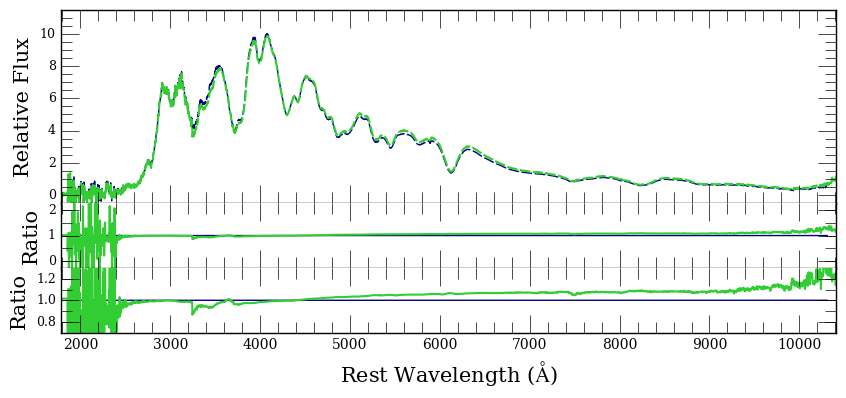

In [40]:
comparisons = []
comparisons.append(comps[0])
comparisons.append(comps_red[0])
comparisons[0].name = "Comp"
comparisons[1].name = "Comp2"
query_db.scaled_plot([comparisons[0], comparisons[1]], dashes = [8, 2])